<a href="https://colab.research.google.com/github/AnushiaS/Emotionaldetection/blob/main/Emotionaldetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving girl3.webp to girl3.webp


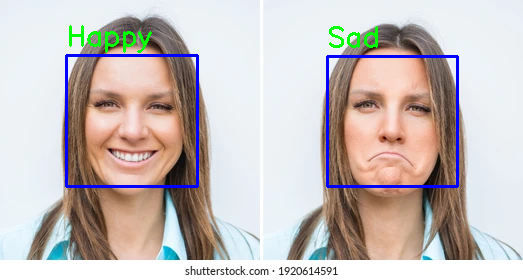

In [3]:
# ✅ Install dependencies
!pip install -q keras opencv-python

# ✅ Download pre-trained emotion model (Mini-XCEPTION, expects 64x64 grayscale)
!wget -q https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O emotion_model.h5

# ✅ Import everything
import cv2
import numpy as np
from keras.models import load_model
from google.colab import files
from google.colab.patches import cv2_imshow

# ✅ Load model
model = load_model("emotion_model.h5", compile=False)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ✅ Upload image
uploaded = files.upload()

# ✅ Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ✅ Process uploaded image
for filename in uploaded.keys():
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (64, 64))  # 🔥 fixed shape
        roi = roi.astype("float32") / 255.0
        roi = np.expand_dims(roi, axis=-1)  # (64, 64, 1)
        roi = np.expand_dims(roi, axis=0)   # (1, 64, 64, 1)

        preds = model.predict(roi, verbose=0)
        label = emotion_labels[np.argmax(preds)]

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # ✅ Show result
    cv2_imshow(img)
